# Preparing the Data and Scraping

Author: Evan Davis  

Created for: 9/26/2022

This is the first notebook out of two.

Next notebook --> `Review Analysis.ipynb`  
  
**WARNING**: The 3 cells at the end of the notebook run the web scraper. The first cell takes ~5.5 hours to run, the second ~2.5 hours, and the third ~2 hours. This amounts to a total of ~10 hours of run time! DO NOT RUN THE WHOLE NOTEBOOK AT ONCE UNLESS YOU ARE WILLING TO WAIT THE ~10 HOURS IT TAKES TO COMPLETE RUNNING THE WEB SCRAPER!  

It is advised to run the notebook section by section, or even cell by cell. The notebook up until the final section that contains the web scraping can be run quickly and easily. Only run the last section if necessary!

---

## Table of Contents

0. Introduction  
1. Getting and Cleaning Data
2. Preparing Data for Scraping Reviews  
3. Testing the Review Scraper
4. Review Scraping for the Top 300 Albums

---

## 0. Introduction

In this notebook, a dataset containing information on the 5,000 top rated albums of all time on rateyourmusic.com is analyzed and prepared for further web scraping. The dataset containing the 5,000 albums can be found at this link: https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom  

The author, Michael A Bryant, also has a public github repository where one can see the `scraper_charts.py` file used to scrape the data for the Kaggle dataset. The repository also contains a `scraper_reviews.py` file that the web scraper in this notebook is based on. The github repository containing these files can be found at this link: https://github.com/MichaelABryant/rate-your-music-scraper  

In this notebook, we will extract and prepare the necessary information from the provided dataset of the top 5,000 albums. Then, we will use this information to inform our custom-built web scraper from which albums to scrape reviews from (URLs contain artist name and album name). Finally, we will save the scraped reviews and export the data into a .csv file for further examination and modeling in the next notebook titled `Review Analysis.ipynb`.

**Important**: This notebook is run an environment with specific libraries installed. Make sure to create the conda environment to run this notebook using the file `scraping_env.yml` located in the `environments` folder.

---

## 1. Getting and Cleaning Data

The very first thing we need to do is to import the libraries we will be working with in this notebook.

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\evanm\anaconda3\envs\ecosystem\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now, we can read in the dataset downloaded from Kaggle. We are creating a copy of the original data so that we can alter the new data frame without messing with the original data.

In [2]:
top_albums = pd.read_csv('data/Top5000.csv')
df = top_albums.copy()
df

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,4397,John Hiatt,May 1987,"Singer/Songwriter, Roots Rock, Americana","love, lethargic, lonely, existential, melodic,...",3.68,727,37,Bring the Family,0.286402,0.607100,0.460700,0.001658,0.125710,-12.683700,0.030090,106.136700,0.568300,273146.700000,4.000000
4398,4398,Catharsis,1999,"Crust Punk, Metalcore","male vocals, anarchism, aggressive, angry, hea...",3.65,616,6,Passion,0.156502,0.572050,0.621100,0.004154,0.250530,-6.659900,0.088560,127.249950,0.432750,202675.450000,3.950000
4399,4399,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32,Gracious!,0.075487,0.528636,0.731000,0.000128,0.222845,-4.805273,0.049027,149.398818,0.622545,193269.454545,4.000000
4400,4400,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15,(Listen For) The Rag and Bone Man,0.417308,0.397462,0.458000,0.543231,0.127646,-13.088692,0.037354,118.958923,0.252892,229115.846154,3.923077


Let's check some general characteristics of the data that we are working with. First up, let's check the shape of the data:

In [3]:
df.shape

(4402, 20)

We have 4,402 rows and 20 columns. Each row represents a single album. The columns contain a variety of information such as the album name, the artist name, the release date, the number of reviews for the album, and various Spotify API measures.

Let's check the data types of each column:

In [4]:
df.dtypes

Unnamed: 0            int64
ars_name             object
rel_date             object
gens                 object
descs                object
avg_rat             float64
num_rat              object
num_revs              int64
album                object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
duration_ms         float64
time_signature      float64
dtype: object

The only standout column appears to be the `num_rat` column; the numbers in the `num_rat` column have commas, and thus are set as strings. Let's get rid of the commas in the `num_rat` column so that the column can be changed from an object to an integer:

In [5]:
df['num_rat'].replace(',', '', regex=True, inplace=True)

Now, we can change the type of the column to integer:

In [6]:
df['num_rat'] = df['num_rat'].astype('int64')

Quick sanity check to make sure that worked:

In [7]:
df.dtypes

Unnamed: 0            int64
ars_name             object
rel_date             object
gens                 object
descs                object
avg_rat             float64
num_rat               int64
num_revs              int64
album                object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
duration_ms         float64
time_signature      float64
dtype: object

Everything seems in order now, but what about NaN values?

In [8]:
df.isna().sum()

Unnamed: 0           0
ars_name             0
rel_date             0
gens                 0
descs               98
avg_rat              0
num_rat              0
num_revs             0
album                0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
valence              0
duration_ms          0
time_signature       0
dtype: int64

This is quite the clean dataset! There are only NaNs in one column (the `descs` column), in which there are 98 NaN values. Lucky for us, we are not going to be working with that column in this notebook, so we do not need to worry about the NaNs in it.

In fact, the only columns we really want to work with are the `ars_name` and `album` columns! Those are the only two columns that will be used for the web scraper to get the review data.

However, it wouldn't hurt to explore some more of the data. If we were to scrape all the reviews for every single album in this dataset, how many reviews would we have?

In [9]:
df['num_revs'].sum()

336924

We'd have 336,924 reviews to work with. That's quite a lot of information considering that each review can be of varying length. However, this number is slightly concerning.  
  
If we make a generous assumption that a page of reviews takes about 2 seconds to scrape, and a page of reviews contains between 5-10 reviews, then how long would our scraper have to run in order to get all of the reviews?

In [37]:
# 5 reviews per page
s_per_review = 2/5
hours_5 = (df['num_revs'].sum()*s_per_review) / 60 / 60

# 10 reviews per page
s_per_review = 2/10
hours_10 = (df['num_revs'].sum()*s_per_review) / 60 / 60

print(hours_5)
print(hours_10)

37.43600000000001
18.718000000000004


The scraper could run between ~20-40 hours based on our generous assumption! So, let's try to minimize the amount of URLs (albums) we are scraping from, as every instance of opening and closing the browser adds a few seconds. Plus, reducing the number of reviews we are working with helps alleviate concerns that will be seen in the next notebook regarding memory storage.

To do this, we need to see the distribution of reviews for the albums:

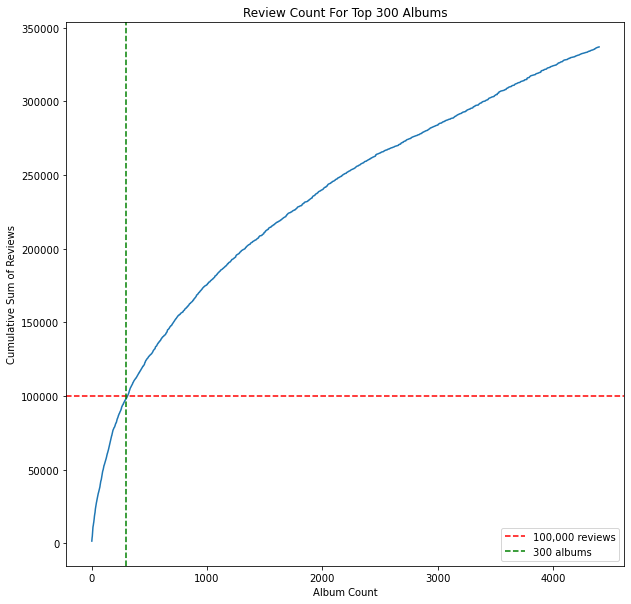

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(df['Unnamed: 0'], np.cumsum(df['num_revs']))
plt.axhline(y=100000, color='r', linestyle='--', label='100,000 reviews')
plt.axvline(x=300, color='g', linestyle='--', label='300 albums')
plt.title('Review Count For Top 300 Albums')
plt.ylabel('Cumulative Sum of Reviews')
plt.xlabel('Album Count')
plt.legend()
plt.show()

We can see that 100,000 reviews are contained in the first 300 albums! As we scrape more and more albums, each album has fewer and fewer reviews. So, deeming that 100,000 reviews is still plenty of data to be used for modeling, we will only be scraping reviews for the first 300 albums. This saves us about 4,000 isntances of the automated browser being opened and closed for every other album that would have been scraped, while keeping ~30% of the reviews!

The trend of each album rank generally having fewer reviews than the last can even be seen in the 300 albums that we are going to be scraping:

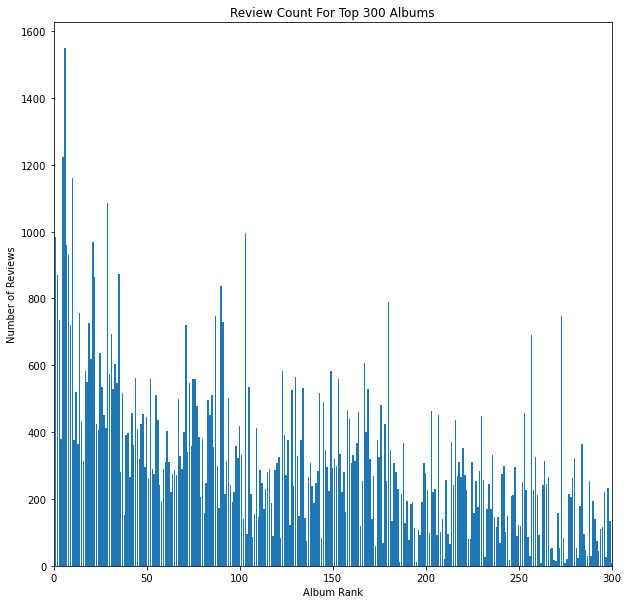

In [23]:
plt.figure(figsize=(10, 10))
plt.bar(df['Unnamed: 0'], df['num_revs'])
plt.title('Review Count For Top 300 Albums')
plt.ylabel('Number of Reviews')
plt.xlabel('Album Rank')
plt.xlim(0, 300)
plt.show()

In particular, how many reviews will we be scraping?

In [27]:
df['num_revs'][0:300].sum()

98394

Exactly 98,394 albums should be scraped by the end of the notebook.

---

## 2. Preparing Data for Scraping Reviews
Now, it is time to start preparing the information from the top 5,000 albums dataset to be used in the web scraper.

When we are going to use the review scraper, we are going to be inputting the artist name and album name into the function. The function takes the inputs and uses them to access the url for scraping reviews. The format for every url on rateyourmusic.com is: ***rateyourmusic.com/release/album/`ars_name`/`album`/*** where there are not upper case letters, and no whitespaces.   

Unfortunately, we cannot just replace whitespaces with a hyphen, make each letter lower case, and call it a day. Album names and artist names can have non-alphanumeric characters that cannot be placed into the URL. Each punctuation mark and other non-alphanumeric characters are dealt with on a case-by-case basis, and there appears to be no standard for how the URL is created with regards to non-alphanumeric characters.  

This process is going to be very tedious. 

Let's take a look at an album that might be problematic:

In [11]:
df.loc[df['album'] == 'Endtroducing.....']

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
45,45,DJ Shadow,19 November 1996,"Instrumental Hip Hop, Experimental Hip Hop, Pl...","sampling, instrumental, atmospheric, urban, my...",4.11,26775,410,Endtroducing.....,0.55955,0.531062,0.622812,0.6965,0.218156,-10.118,0.140013,108.203688,0.528844,236480.875,3.625


This album name contains 5 periods, and periods cannot be used in URLs. Therefore, we must change the name to be able to be referenced and inputted into the review scraper so that it doesn't navigate to a URL that doesn't exist.

In fact, we must do this for every possible name that could cause a problem in order to scrape all of the data possible.

Which non-alphanumeric charaters do we need to deal with?

In [38]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Now, let's find out how each punctuation mark is dealt with:

For some reason, non-alphanumeric characters are not all treated the same way. Here are the conditions for each non-alphnumeric character:  
- `'` is removed
- `!` is removed
- `"` is removed
- `#` is replaced with a `_` in one example, but is replaced in the other occurance. However, if we remove it, we lose 167 reviews compared to the 46 reviews lost if we replace it with a `_`. So we will do that
- `$` is replaced with a `_` in the sole occurance across both artist and album names. If we update/expand the list, it might be wiser to remove the character all together as that occurs more often in other artist names that don't appear in this particular dataset. (joey bada$$ -> joey bada)
- `%` does not occur in our data. If we update the list, we will have to check again. For now, we do not have to deal with it.
- `&` is replaced with `and` in most cases, except for when the & represents two separate listed artists rather than two artists listed as one contributor. Weird case, but so far I only noticed it for the Velvet Underground & Nico, which has the `&` removed in the artist name, but repalced by `and` in the album name. Odd and annoying. There are more cases like that, but I'm not gonna go through every one, so oops we're losing some data.
- `\` does not occur in the data.
- `'` is removed
- `(` and `)` are both removed in most cases. If the name starts with `(`, with exception of Sigur Ros's '( )', then the parentheses is replaced by a `_`
- `*` does not occur in the data
- `+` is removed in all cases except for the artist 'catherine ribeiro + alpes', in which the + and whitespaces around it were replaced with 3 whitespaces
- `,` is removed. Except for some reason 'Crooked Rain, Crooked Rain' becomes 'crooked_rain__crooked_rain'
- `-` is kept the same, as it already works for the url
- `.` is a weird one. If it just at the end of a word, or at the end of the whole name, then it is removed. Otherwise, it's replaced with a `_`
- `/` is replaced by a whitepsace if there are whitespaces around it. If there are no whitespaces, then it is repalced with a `_`
- `:` is removed
- `;` is removed
- `<` and `>` do not occur in the data
- `=` is removed
- `?` is removed
- `@` does not occur in the data
- `[` and `]` are removed in the album name, but for the artist name, everthing inside the brackets including the brackets is removed
- `\` does not occur in the data
- `^` does not occur in the data
- `_` is left as is
- ` does not occur in the data
- `{` and `}` do not occur in the data
- `|` does not occur in the data
- `~` does not occur in the data
- `...` are deleted if they're trailing a word. If they're preceeding, it is replaced by `_`

Before we can replace/remove the punctuation marks, we must deal with some specific cases that don't abide by the rules of the non-alphanumeric cases, for some reason:

In [13]:
# Velvet Underground & Nico
df['ars_name'].replace('The Velvet Underground & Nico', 'The Velvet Underground Nico', regex=True, inplace=True)

# Sigur Ros
df['album'].replace('\( \)', ' ', regex=True, inplace=True)

# Pavement
df['album'].replace('Crooked Rain, Crooked Rain', 'crooked_rain__crooked_rain', regex=True, inplace=True)

# Catherine Ribeiro
df['ars_name'].replace('Catherine Ribeiro + Alpes', 'Catherine_Ribeiro___Alpes', regex=True, inplace=True)

# Artists with brackets
df['ars_name'].replace('[\(\[].*?[\)\]]', '', regex=True, inplace=True)

There may be more odd cases that we didn't catch here. However, identifying them would require going to ~4,400 URLs and noting when the URL is structured differently than others. This process would be incredibly tedious and time wasting, so we will proceed. 

Now, let's put all of the conditions into a list to be able to loop over for replacement:

In [14]:
punctuation = [
    ['\'', ''], # backslash
    ['\!', ''], # exclamation point
    ['\"', ''], # quotation marks
    ['\#', '_'], # hashtag
    ['\$', '_'], # dollar symbol
    ['\&', 'and'], # ampersand
    ['\'', ''], # apostrophe
    ['^\(', '_'], # name starting with open and paranthesis
    ['\(', ''], # open paranthesis
    ['\)', ''], # closed paranthesis
    ['\+', ''], # plus sign
    ['\,', ''], # comma
    [' / ', ' '], # forward slash with whitespaces
    ['\/', '_'], # forward slash
    ['\:', ''], # colon
    ['\;', ''], # semicolon
    ['\=', ''], # equals sign
    ['\?', ''], # question mark
    ['\[', ''], # open bracket
    ['\]', ''], # closed bracket
    ['^\.\.\.', '_'], # ellipses that are at the start of a name
    ['\s\.\.\.', '_'], # ellipses that precede a word
    ['\.\.\.\.\.', ''], # even longer ellipses
    ['\.\.\.\.', ''], # longer ellipses
    ['\.\.\.', ''], # ellipses
    ['\.\s', ''], # period at end of word (space after)
    ['\.$', ''], # period at end of whole name
    ['\.', '_'] # periods
]

**NOTE**: ORDER MATTERS! Replacing a character before another might mess with more URLs than intended! For example, ellipses not at the beginning of a word are removed entirely, but individual periods get replaced with an underscore. So, you must order it so that ellipses don't become a sequence of three underscores!

Now we can loop over each condition and replace/remove the punctuation for all artist names and album names:

In [15]:
for i in range(len(punctuation)):
    condition = punctuation[i][0]
    replacement = punctuation[i][1]
    df['ars_name'].replace(f'{condition}', f'{replacement}', regex=True, inplace=True)
    df['album'].replace(f'{condition}', f'{replacement}', regex=True, inplace=True)

Let's see if it did what we expect with exclamation points (remove):

In [16]:
df[df['ars_name'].str.contains('\!', regex=True)]

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature


Seems like it did!

Just to make sure, what about with underscores (remove)?

In [17]:
df[df['album'].str.contains('\_', regex=True)]

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
16,16,Kendrick Lamar,22 October 2012,"West Coast Hip Hop, Conscious Hip Hop","urban, crime, concept album, conscious, intros...",4.20,38939,315,good kid m_A_A_d city,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
102,102,MF DOOM,16 November 2004,"East Coast Hip Hop, Abstract Hip Hop","sampling, concept album, playful, humorous, ab...",4.06,19641,141,Mm_Food,0.261467,0.603600,0.755467,0.000369,0.454320,-6.962467,0.330000,104.546800,0.753000,195652.466667,3.866667
172,172,Pavement,14 February 1994,Indie Rock,"playful, bittersweet, melodic, summer, satiric...",3.96,17833,268,crooked_rain__crooked_rain,0.092591,0.378167,0.580333,0.257311,0.204192,-10.973250,0.035408,127.992250,0.443000,211986.666667,3.916667
262,262,Wiener Philharmoniker Carlos Kleiber,1975,"Symphony, Romanticism","instrumental, acoustic, triumphant, epic, orch...",4.02,1008,7,Symphonie Nr_5,0.908000,0.196800,0.062930,0.605400,0.206340,-27.377400,0.048740,98.525200,0.089280,869976.600000,3.600000
328,328,The Doors,29 April 1971,"Blues Rock, Psychedelic Rock","poetic, psychedelic, male vocals, cryptic, urb...",3.89,14553,303,L_AWoman,0.188640,0.607400,0.554300,0.031464,0.106420,-10.120700,0.038430,123.814800,0.698400,291106.700000,4.000000
458,458,Metallica,25 August 1988,Thrash Metal,"political, angry, technical, heavy, male vocal...",3.80,22248,577,_And Justice for All,0.116369,0.354800,0.794200,0.465554,0.478882,-9.952800,0.109164,117.741700,0.340012,281038.640000,3.900000
482,482,Wiener Philharmoniker Carlos Kleiber,1976,"Symphony, Classical Period","symphony, acoustic, instrumental, epic, lush, ...",3.96,342,0,Symphonie Nr_7,0.925000,0.206200,0.075840,0.577400,0.129000,-25.493000,0.040100,93.544400,0.114240,882610.800000,4.000000
522,522,Mach-Hommy,28 September 2017,"Jazz Rap, East Coast Hip Hop, Conscious Hip Hop","sampling, boastful, urban, lo-fi, repetitive, ...",3.90,1383,10,The G_A_T,0.040700,0.713000,0.901000,0.000000,0.095600,-4.154000,0.293000,92.972000,0.630000,193754.000000,4.000000
706,706,Queens of the Stone Age,3 June 2013,Alternative Rock,"sombre, death, male vocals, lonely, melancholi...",3.81,13099,152,_Like Clockwork,0.181399,0.412100,0.692100,0.058657,0.254540,-5.964300,0.053260,129.340100,0.362600,276322.800000,3.600000
821,821,The Pretty Things,December 1968,"Psychedelic Rock, Rock Opera","psychedelic, rock opera, male vocals, war, dea...",3.84,4181,125,S_FSorrow,0.200740,0.386706,0.516412,0.168701,0.262912,-12.164412,0.046306,121.460706,0.420882,199985.823529,3.764706


Looks like we're good here!

We dealt with punctuation characters, but what about writing from other languages? Accents and other types of text can't be interpreted in the URL, yet symbols and other alphabets can. 

One way we can deal with this is by using unidecode library (must have it installed on the environment):

In [18]:
from unidecode import unidecode # test for japanese/chinese characters, greek/hebrew letters, shapes/symbols, etc.

print(unidecode('東京事変'))
print(unidecode('Ä'))
print(unidecode('⊿ (Triangle)'))

Dong Jing Shi Bian 
A
 (Triangle)


It doesn't appear to work very well in general. Unidecode only works for dealing names that use the latin alphabet (and their accents), such as names in English and the romance languages. However, for russian letters, japanese/chinese characters, hebrew, shapes/symbols, etc. It acts differently. It may translate other languages' characters into latin characters, and removes symbols outright. This won't work for our URL inputs.  

Therefore, we need to define our own dictionary and replace manually, just like for the punctuation:

In [19]:
accents = [
    ["ÆǼ", "AE"],
    ["æǽ", "ae"],
    ["œ", "oe"],
    ["ÀÁÂÃÄÅǺĀĂĄǍΑΆẢẠẦẪẨẬẰẮẴẲẶАÄ", "A"],
    ["àáâãåǻāăąǎªảạầấẫẩậằắẵẳặаä", "a"],
    ["ÇĆĈĊČ", "C"],
    ["çćĉċč", "c"],
    ["ÐĎĐ", "D"],
    ["ďđ", "d"],
    ["ÈÉÊËĒĔĖĘĚΕΈẼẺẸỀẾỄỂỆЕЁ", "E"],
    ["èéêëēĕėęěέεẽẻẹềếễểệеё", "e"],
    ["ĜĞĠĢ", "G"],
    ["ĝğġģ", "g"],
    ["ĤĦ", "H"],
    ["ĥħ", "h"],
    ["ÌÍÎÏĨĪĬǏĮİΊΙΪỈỊ", "I"],
    ["ìíîïĩīĭǐįίιϊỉịї", "i"],
    ["Ĵ", "J"],
    ["ĵ", "j"],
    ["ĹĻĽĿŁ", "L"],
    ["ĺļľŀł", "l"],
    ["ÑŃŅŇΝ", "N"],
    ["ñńņňŉ", "n"],
    ["ÒÓÔÕŌŎǑŐƠØǾΟΌΩΏỎỌỒỐỖỔỘỜỚỠỞỢОÖ", "O"],
    ["òóôõōŏǒőơøǿºοόωώỏọồốỗổộờớỡởợоö", "o"],
    ["ŔŖŘ", "R"],
    ["ŕŗř", "r"],
    ["ŚŜŞȘŠ", "S"],
    ["śŝşșš", "s"],
    ["ȚŢŤŦ", "T"],
    ["țţťŧ", "t"],
    ["ÙÚÛŨŪŬŮŰŲƯǓǕǗǙǛŨỦỤỪỨỮỬỰÜ", "U"],
    ["ùúûũūŭůűųưǔǖǘǚǜυύϋủụừứữửựü", "u"],
    ["ÝŸŶΫỲỸỶỴ", "Y"],
    ["ýÿŷỳỹỷỵ", "y"],
    ["Ŵ", "W"],
    ["ŵ", "w"],
    ["ŹŻŽ", "Z"],
    ["źżž", "z"]
]

Now, we iterate over every condition use the appropriate replacement for all of the artist names and album names:

In [20]:
for i in range(len(accents)):
    for j, k in enumerate(accents[i][0]):
        condition = k
        replacement = accents[i][1]
        df['ars_name'].replace(f'{condition}', f'{replacement}', regex=True, inplace=True)
        df['album'].replace(f'{condition}', f'{replacement}', regex=True, inplace=True)

Let's see if this worked:

In [21]:
df[df['ars_name'].str.contains('Sigur Ros', regex=True)]

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
83,83,Sigur Ros,12 June 1999,Post-Rock,"ethereal, atmospheric, soothing, melancholic, ...",4.04,26732,496,Agaetis byrjun,0.463170,0.189500,0.397880,0.641840,0.119490,-13.625900,0.045090,117.177400,0.095190,431750.400000,3.900000
280,280,Sigur Ros,28 October 2002,Post-Rock,"melancholic, ethereal, atmospheric, soothing, ...",3.91,16174,322,,0.066900,0.443000,0.720000,0.000000,0.090900,-3.743000,0.073300,89.378000,0.374000,301304.000000,4.000000
1027,1027,Sigur Ros,13 September 2005,Post-Rock,"ethereal, melancholic, uplifting, atmospheric,...",3.76,13236,234,Takk,0.488609,0.242727,0.403836,0.773818,0.193109,-11.039909,0.038345,113.266182,0.098855,357515.090909,3.818182
4305,4305,Sigur Ros,6 November 2007,Post-Rock,"peaceful, mellow, hypnotic, atmospheric, playf...",3.66,3520,62,Hvarf Heim,0.482127,0.263182,0.380827,0.630945,0.117064,-8.887091,0.033927,107.045000,0.076045,395047.181818,3.909091


It seems it did! 'Sigur Rós' became 'Sigur Ros'.

Now, with all the non-alphanumeric characters out of the way, let's follow the last conventions of the URL. The URLs for rateyourmusic.com all have lowercase numbers and all whitepaces are replaced by hyphens. We must also account for when a whitespace is replaced by a hyphen, and there may be two hyphens back to back.

In [22]:
# artist name
df['ars_name'].replace(' ', '-', regex=True, inplace=True)
df['ars_name'].replace('--', '-', regex=True, inplace=True)
df['ars_name'] = df['ars_name'].str.lower()

# album name
df['album'].replace(' ', '-', regex=True, inplace=True)
df['album'].replace('--', '-', regex=True, inplace=True)
df['album'] = df['album'].str.lower()

# check
df[['ars_name','album']]

,ars_name,album
0,radiohead,ok-computer
1,pink-floyd,wish-you-were-here
2,king-crimson,in-the-court-of-the-crimson-king
3,radiohead,kid-a
4,kendrick-lamar,to-pimp-a-butterfly
...,...,...
4397,john-hiatt,bring-the-family
4398,catharsis,passion
4399,gracious,gracious
4400,and-also-the-trees,_listen-for-the-rag-and-bone-man


With all of the artist names and album names now properly formatted to be used in the review scraper, we can save this new data frame as a .csv file so that we don't have to run all of this code again.

In [28]:
df.to_csv('data/Top5000_edited.csv', header=True)

---

## 3. Testing the Review Scraper

As the review scraper is a .py file in the same directory as this notebook, we can just import it like so:

In [29]:
import review_scraper

Let's do a test run of the scraper for album #1,500:

In [30]:
reviews, albums, ratings, users = review_scraper.get_album_reviews(artist = df['ars_name'][1500],
                                                                    album = df['album'][1500], 
                                                                    num_reviews = 2000, 
                                                                    verbose = True) 

We can put the outputs from the scraper into a data frame and see what we got:

In [31]:
test_df = pd.DataFrame({'reviews': reviews,
                       'album': albums,
                       'rating': ratings,
                       'user': users})

test_df.head()

,reviews,album,rating,user
0,"[To my knowledge, any association between Tony...",trilogie-de-la-mort,5.00 stars,Phimister
1,"[, , , É como o estudo dos efeitos psicológico...",trilogie-de-la-mort,4.50 stars,FreakingJames
2,"[, , , A love letter written by La Monte and C...",trilogie-de-la-mort,4.50 stars,deter
3,"[, , , Eliane Radigue took peace, silence and ...",trilogie-de-la-mort,5.00 stars,TheSaltman
4,[I finally found the perfect album to fall asl...,trilogie-de-la-mort,5.00 stars,nick121235


It works! Now, we can get to the real deal.

---

## 4. Review Scraping for the Top 300 Albums

It is time to scrape all the reviews from the top 300 albums. We will be scraping 100 albums at a time so that we can stop periodically. We do not want to run all ~10 hours of this code at once.  

After scraping all of the reviews for the designated albums, we create a data frame from the information returned, and export the data frame to a .csv file to be used in the next notebook for analysis and modeling. 

First, we start with the top 100 albums:

In [35]:
# gather reviews for each album, 100 at a time since I don't know how long this will take
total_start = time.time()

all_reviews, all_albums, all_ratings, all_users = [], [], [], []

for i in range(0, 100):
    
    start_time = time.time()

    artist_name = df['ars_name'][i]
    album_name = df['album'][i]
    
    reviews, albums, ratings, users = review_scraper.get_album_reviews(artist = artist_name, 
                                                                        album = album_name,    
                                                                        num_reviews = 2000,    
                                                                        verbose = True)
    
    end_time = time.time()
    time_diff = round(end_time - start_time, 2)

    print(f'It took {time_diff} seconds to get reviews for {album_name}.')
    
    all_reviews.extend(reviews)
    all_albums.extend(albums)
    all_ratings.extend(ratings)
    all_users.extend(users)

review_df1 = pd.DataFrame({'review': all_reviews,
                   'album': all_albums,
                   'rating': all_ratings,
                   'user': all_users})

total_end = time.time()
total_diff = round(total_end - total_start, 2)

print(f'It took {total_diff/60/60} hours, {review_df1.shape[0]} reviews for albums #0-100')

review_df1.to_csv('data/top100_reviews.csv')

It took 618.8 seconds to get reviews for ok-computer.
It took 339.2 seconds to get reviews for wish-you-were-here.
It took 320.5 seconds to get reviews for in-the-court-of-the-crimson-king.
It took 320.24 seconds to get reviews for kid-a.
It took 215.34 seconds to get reviews for to-pimp-a-butterfly.
It took 539.93 seconds to get reviews for loveless.
It took 557.81 seconds to get reviews for the-dark-side-of-the-moon.
It took 379.18 seconds to get reviews for abbey-road.
It took 415.79 seconds to get reviews for the-velvet-underground-and-nico.
It took 275.12 seconds to get reviews for the-rise-and-fall-of-ziggy-stardust-and-the-spiders-from-mars.
It took 512.57 seconds to get reviews for revolver.
It took 188.0 seconds to get reviews for madvillainy.
It took 200.25 seconds to get reviews for remain-in-light.
It took 128.11 seconds to get reviews for the-black-saint-and-the-sinner-lady.
It took 279.12 seconds to get reviews for in-rainbows.
It took 153.02 seconds to get reviews for a-

Next, we scrape reviews for albums #100-200:

In [29]:
# gather reviews for each album, 100 at a time since I don't know how long this will take
total_start = time.time()

all_reviews, all_albums, all_ratings, all_users = [], [], [], []

for i in range(100, 200):
    
    start_time = time.time()

    artist_name = df['ars_name'][i]
    album_name = df['album'][i]
    
    reviews, albums, ratings, users = review_scraper.get_album_reviews(artist = artist_name, 
                                                                        album = album_name,    
                                                                        num_reviews = 2000,    
                                                                        verbose = True)
    
    end_time = time.time()
    time_diff = round(end_time - start_time, 2)

    print(f'It took {time_diff} seconds to get reviews for {album_name}.')
    
    all_reviews.extend(reviews)
    all_albums.extend(albums)
    all_ratings.extend(ratings)
    all_users.extend(users)

review_df2 = pd.DataFrame({'review': all_reviews,
                   'album': all_albums,
                   'rating': all_ratings,
                   'user': all_users})

total_end = time.time()
total_diff = round(total_end - total_start, 2)

print(f'It took {total_diff/60/60} hours, {review_df2.shape[0]} reviews for albums #100-200'

review_df2.to_csv('data/100-200_reviews.csv')

It took 146.43 seconds to get reviews for odessey-and-oracle.
It took 119.89 seconds to get reviews for mezzanine.
URL/Reviews not found for mm_food by mf-doom
It took 18.14 seconds to get reviews for mm_food.
It took 312.28 seconds to get reviews for nevermind.
It took 42.55 seconds to get reviews for hatful-of-hollow.
It took 182.98 seconds to get reviews for in-utero.
It took 77.98 seconds to get reviews for symbolic.
It took 35.32 seconds to get reviews for twin-peaks.
It took 56.09 seconds to get reviews for my-favorite-things.
It took 151.35 seconds to get reviews for the-downward-spiral.
It took 54.92 seconds to get reviews for karma.
It took 96.67 seconds to get reviews for deathconsciousness.
URL/Reviews not found for the-lonesome-crowded-west by modest-mouse
It took 10.14 seconds to get reviews for the-lonesome-crowded-west.
It took 13.29 seconds to get reviews for mingus-ah-um.
It took 117.62 seconds to get reviews for late-registration.
It took 97.95 seconds to get reviews 

And finally, we scrape the reviews for albums #200-300:

In [30]:
# gather reviews for each album, 100 at a time since I don't know how long this will take
total_start = time.time()

all_reviews, all_albums, all_ratings, all_users = [], [], [], []

for i in range(200, 300):
    
    start_time = time.time()

    artist_name = df['ars_name'][i]
    album_name = df['album'][i]
    
    reviews, albums, ratings, users = review_scraper.get_album_reviews(artist = artist_name, 
                                                                        album = album_name,    
                                                                        num_reviews = 2000,    
                                                                        verbose = True)
    
    end_time = time.time()
    time_diff = round(end_time - start_time, 2)

    print(f'It took {time_diff} seconds to get reviews for {album_name}.')
    
    all_reviews.extend(reviews)
    all_albums.extend(albums)
    all_ratings.extend(ratings)
    all_users.extend(users)

review_df3 = pd.DataFrame({'review': all_reviews,
                   'album': all_albums,
                   'rating': all_ratings,
                   'user': all_users})

total_end = time.time()
total_diff = round(total_end - total_start, 2)

print(f'It took {total_diff/60/60} hours, {review_df3.shape[0]} reviews for albums #200-300')

review_df3.to_csv('200-300_reviews.csv')

It took 116.0 seconds to get reviews for a-moon-shaped-pool.
It took 80.35 seconds to get reviews for dopethrone.
It took 48.26 seconds to get reviews for we-got-it-from-here…-thank-you-4-your-service.
It took 161.27 seconds to get reviews for physical-graffiti.
It took 82.48 seconds to get reviews for treasure.
It took 79.25 seconds to get reviews for discipline.
It took 53.53 seconds to get reviews for minecraft-volume-alpha.
It took 160.61 seconds to get reviews for dirt.
It took 67.73 seconds to get reviews for sometimes-i-might-be-introvert.
It took 50.98 seconds to get reviews for a-tribute-to-jack-johnson.
It took 46.18 seconds to get reviews for mercurial-world.
It took 92.63 seconds to get reviews for jane-doe.
It took 42.05 seconds to get reviews for mount-eerie.
It took 31.04 seconds to get reviews for townes-van-zandt.
It took 132.38 seconds to get reviews for yankee-hotel-foxtrot.
It took 89.56 seconds to get reviews for you-wont-get-what-you-want.
It took 141.2 seconds to

Congrats! We have now scraped nearly 100,000 reviews for 300 albums!  

We now proceed to the second notebook titled `Review Analysis.ipynb`.

---